### facebook에서 공개한 단어 벡터 모델(영어, 한국어) 다운로드

In [0]:
# 영어 단어 벡터 모델 다운
!curl -LO https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
!unzip wiki.en.zip -d /content/wiki.en

# 한글 단어 벡터 모델 다운
!curl -LO https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ko.zip
!unzip wiki.ko.zip -d /content/wiki.ko

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9877M  100 9877M    0     0  50.2M      0  0:03:16  0:03:16 --:--:-- 48.2M
Archive:  wiki.en.zip
replace /content/wiki.en/wiki.en.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 라이브러리 임포트

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

### wiki.en.vec 모델 load

In [0]:
model = KeyedVectors.load_word2vec_format('/content/wiki.en/wiki.en.vec')
model_ko = KeyedVectors.load_word2vec_format('/content/wiki.ko/wiki.ko.vec')

### most_similar() 함수를 이용하여 입력한 단어와 유사한 10개 의단어를 조회
* 모델 내부적으로 코사인 유사도를 이용하여 유사한 단어를 선택함

In [11]:
model.most_similar('ocean')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('oceans', 0.7551381587982178),
 ('ocean—and', 0.7406810522079468),
 ('ocean,', 0.7171754837036133),
 ('ocean—the', 0.7073656916618347),
 ('ocean—a', 0.7033048868179321),
 ('ocean—in', 0.6893353462219238),
 ('atlantic', 0.6805956959724426),
 ('seas', 0.6747892498970032),
 ('oceanic', 0.670882523059845),
 ('oceanics', 0.6632441282272339)]

### most_similar(positive=, negative=) 함수를 이용하여 아날로지 테스트 수행
  * x1 과 x2 사이의 관계를 y1에 적용

In [0]:
def analogy(x1, x2, y1):
  result = model.most_similar_cosmul(positive=[y1,x2], negative=[x1])
  return result[0][0]

In [20]:
analogy('dog','animal','apple')

'ifruit'

In [22]:
print(model.doesnt_match("japan korea china dog".split()))

dog


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### 단어 임베딩을 PCA 알고리즘을 이용하여 2차원으로 축소 후 시각화
* 2차원으로 축소 후 시각화 함수 정의

In [0]:
def display_pca_scatterplot(model, words=None, sample=0):
    # 사용자에게 입력 받은 words 없을 시 model 에서 샘플링
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    # words 리스트에 담겨 있는 단어를 model에 전달하여 해당 단어의 벡터 값 조회    
    word_vectors = np.array([model[w] for w in words])

    # word_vectors 에 담겨 있는 단어 벡터를 PCA 알고리즘을 이용해 중요도 순으로 축 정보를 변경 후
    # 상위 2개의 축에 해당하는 정보만 가져와서 2차원으로 차원축소
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    # 6X6 사이즈로 차트의 크기 설정
    plt.figure(figsize=(6,6))

    # 2차원으로 차원 축소된 단어 벡터를 산점도 차트로 시각화
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')

    # 산점도에 그려진 각 각의 점마다 해당 점의 단어 텍스트 정보 추가
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

* 아래 단어 샘플들을 display_pca_scatterplot 함수에 전달하여 시각화

In [0]:
sample_words =   ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                  'spaghetti', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                  'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                  'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wolf',
                  'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                  'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                  'school', 'college', 'university', 'institute']

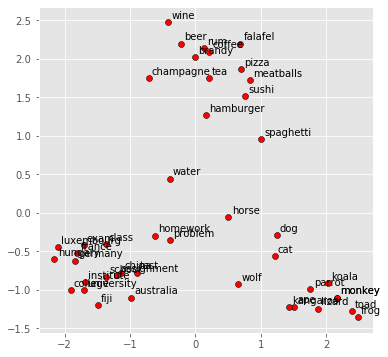

In [35]:
display_pca_scatterplot(model,sample_words)

* display_pca_scatterplot 함수를 이용하여 모델에 입력된 단어 중 30개를 샘플링 하여 시각화

### wiki.ko.vec 모델을 이용한 단어 임베딩 테스트 및 시각화

### most_similar() 함수를 이용하여 입력한 단어와 유사한 10개 의단어를 조회

In [39]:
model_ko.most_similar('커피')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('커피콩', 0.865799069404602),
 ('원두커피', 0.8420517444610596),
 ('커피잔', 0.8405678868293762),
 ('커피도', 0.833494246006012),
 ('커피집', 0.8334570527076721),
 ('커피향', 0.8272414207458496),
 ('커피콩과', 0.8265355825424194),
 ('커피콩을', 0.8218377828598022),
 ('캔커피', 0.820409893989563),
 ('커피점', 0.819298267364502)]

### most_similar(positive=, negative=) 함수를 이용하여 아날로지 테스트 수행

In [0]:
model = model_ko

In [43]:
analogy('해','달','얼음')

'목성'

### Matplotlib 한글 폰트 설정
* 아래 셀 실행 시 바로 한글 폰트 적용됨

In [3]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

### 단어 임베딩을 PCA 알고리즘을 이용하여 2차원으로 축소 후 시각화 함수 정의
* display_pca_scatterplot 함수를 이용하여 모델에 입력된 단어 중 30개를 샘플링 하여 시각화

In [2]:
display_pca_scatterplot(model,None,30)

NameError: ignored